
Lay toa do

In [26]:
import cv2

img = cv2.imread("exercise/dalat.jpg")
clone = img.copy()
refPt = []
cropping = False
def click_and_crop(event, x, y, flags, param):
    global refPt, cropping

    if event == cv2.EVENT_LBUTTONDOWN:
        refPt = [(x, y)]
        cropping = True

    elif event == cv2.EVENT_LBUTTONUP:
        refPt.append((x, y))
        cropping = False

        # Vẽ hình chữ nhật
        cv2.rectangle(img, refPt[0], refPt[1], (0, 255, 0), 2)
        cv2.imshow("image", img)

        # In tọa độ
        x1, y1 = refPt[0]
        x2, y2 = refPt[1]
        print(f"x={x1}, y={y1}, width={x2-x1}, height={y2-y1}")

cv2.namedWindow("image")
cv2.setMouseCallback("image", click_and_crop)

while True:
    cv2.imshow("image", img)
    key = cv2.waitKey(1) & 0xFF
    if key == ord("r"):
        img = clone.copy()
    elif key == ord("q"):
        break

cv2.destroyAllWindows()


x=1006, y=19, width=475, height=323


Câu 1: Chọn LangBiang – Otsu Thresholding

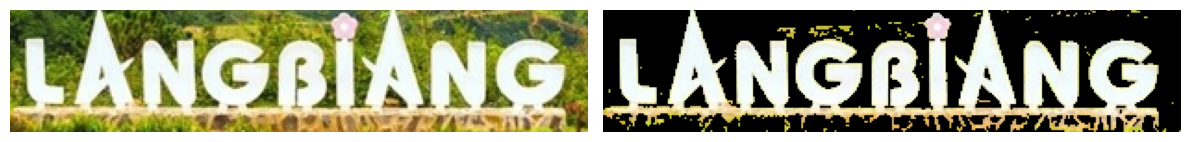

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("exercise/dalat.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x, y, w, h = 126, 268, 312, 66
crop = image[y:y+h, x:x+w]
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
segmented = cv2.bitwise_and(crop, crop, mask=mask)
cv2.imwrite("lang_biang.jpg", segmented)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(segmented, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.tight_layout()
plt.show()


câu 2

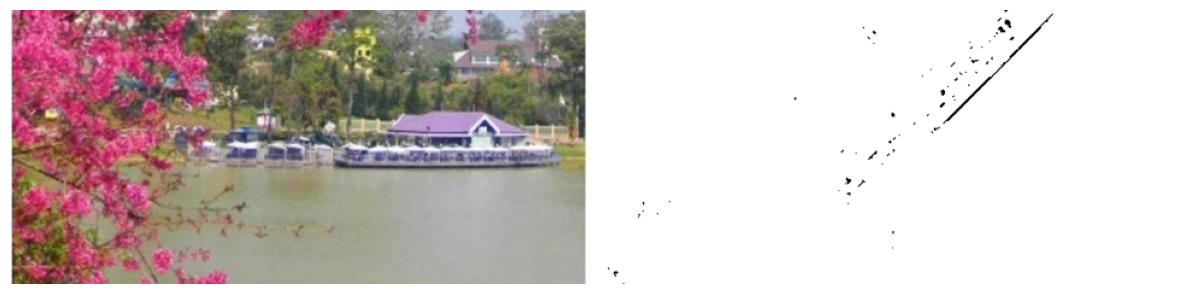

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("exercise/dalat.jpg")
x, y, w, h = 510, 447, 480, 228
crop = image[y:y+h, x:x+w]

gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                 cv2.THRESH_BINARY, 11, 60)

(h_crop, w_crop) = adaptive.shape
center = (w_crop // 2, h_crop // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(adaptive, M, (w_crop, h_crop), borderValue=255)

cv2.imwrite("ho_xuan_huong.jpg", rotated)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(rotated, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()


cau 3

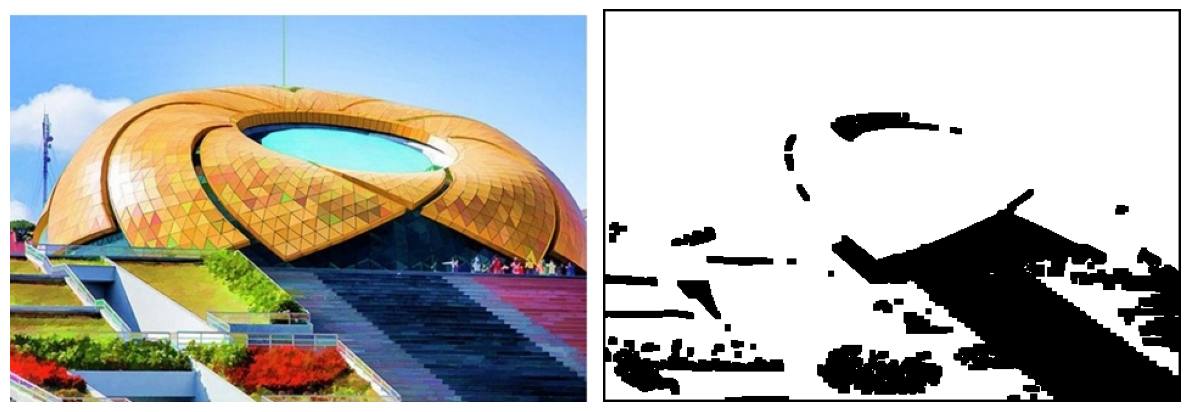

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_closing

image = cv2.imread("exercise/dalat.jpg")
x, y, w, h = 1006, 19, 475, 323
crop = image[y:y+h, x:x+w]

gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
normalized = cv2.normalize(gray, None, 0, 255, cv2.NORM_MINMAX)

thresholded = (normalized > 100).astype(np.uint8) * 255
closed = binary_closing(thresholded, structure=np.ones((5, 5))).astype(np.uint8) * 255

cv2.imwrite("quang_truong.jpg", closed)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(closed, cmap='gray')
plt.axis("off")
plt.tight_layout()
plt.show()


Câu 4 : Tạo menu cho phép chọn 1 trong 3 đối tượng trên (LangBiang, Hồ Xuân Hương, Quảng Trường Lâm Viên) để hiển thị ảnh gốc và kết quả đã xử lý.

Chọn ảnh để hiển thị:
1 - LangBiang
2 - Hồ Xuân Hương
3 - Quảng Trường Lâm Viên


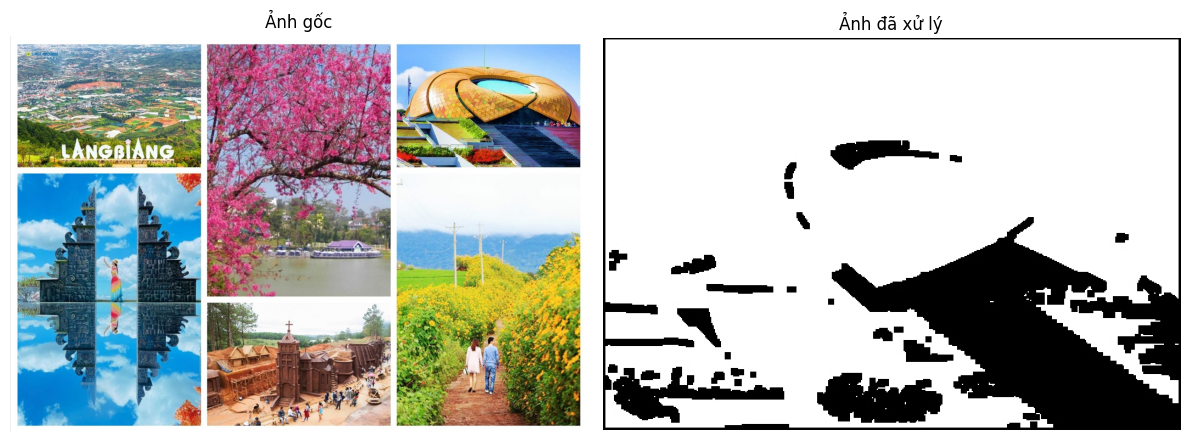

In [32]:
import cv2
import matplotlib.pyplot as plt

def show_images(original_path, processed_path):
    original = cv2.imread(original_path)
    processed = cv2.imread(processed_path, cv2.IMREAD_UNCHANGED)
    
    if len(processed.shape) == 2:
        processed_show = processed
        cmap = 'gray'
    else:
        processed_show = cv2.cvtColor(processed, cv2.COLOR_BGR2RGB)
        cmap = None
    
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(processed_show, cmap=cmap)
    plt.title("Ảnh đã xử lý")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

print("Chọn ảnh để hiển thị:")
print("1 - LangBiang")
print("2 - Hồ Xuân Hương")
print("3 - Quảng Trường Lâm Viên")
choice = input("Nhập lựa chọn (1/2/3): ")

if choice == "1":
    show_images("exercise/dalat.jpg", "lang_biang.jpg")
elif choice == "2":
    show_images("exercise/dalat.jpg", "ho_xuan_huong.jpg")
elif choice == "3":
    show_images("exercise/dalat.jpg", "quang_truong.jpg")
else:
    print("Lựa chọn không hợp lệ.")
